In [6]:
import pandas as pd
import numpy as np

# Read CSV files
times_df = pd.read_csv("morrisonhighresquarriesdates.csv").drop_duplicates()
edges_df = pd.read_csv("taxa_morrison_quarries.csv")
times_df = times_df.reset_index(drop=True)
times_df.columns = ['from', 'time_foster', 'time_turner', 'time_maidment']
times_df["from"]

0                     Bone Cabin Quarry
1                Cleveland-Lloyd Quarry
2                         Cope's Nipple
3     Dinosaur National Monument Quarry
4                       Dry Mesa Quarry
5                           FPA General
6              Hanksville-Burpee Quarry
7                           Howe Quarry
8                  Howe-Stephens Quarry
9                 Little Houston Quarry
10                   Marsh-Felch Quarry
11                  Mygatt-Moore Quarry
12                          Nail Quarry
13                  Poison Creek Quarry
14             Rainbow Park Locality 94
15             Rainbow Park Locality 96
16                     Reed's Quarry 12
17                     Reed's Quarry 13
18                      Reed's Quarry 8
19                      Reed's Quarry 9
20                     Stovall Quarry 1
Name: from, dtype: object

In [16]:
edges_df.columns = ['from', 'to', 'weight']
edges_df

,from,to,weight
0,Bone Cabin Quarry,Allosaurus,1
1,Bone Cabin Quarry,Apatosaurus,1
2,Bone Cabin Quarry,Barosaurus,1
3,Bone Cabin Quarry,Camarasaurus,1
4,Bone Cabin Quarry,Camptosaurus,1
...,...,...,...
155,Stovall Quarry 1,Apatosaurus,1
156,Stovall Quarry 1,Brachiosaurus,1
157,Stovall Quarry 1,Camarasaurus,1
158,Stovall Quarry 1,Camptosaurus,1


In [17]:
edges_df = edges_df.merge(times_df, on='from', how='left')
edges_df

,from,to,weight,time_foster,time_turner,time_maidment
0,Bone Cabin Quarry,Allosaurus,1,Zone 2,2,6.0
1,Bone Cabin Quarry,Apatosaurus,1,Zone 2,2,6.0
2,Bone Cabin Quarry,Barosaurus,1,Zone 2,2,6.0
3,Bone Cabin Quarry,Camarasaurus,1,Zone 2,2,6.0
4,Bone Cabin Quarry,Camptosaurus,1,Zone 2,2,6.0
...,...,...,...,...,...,...
155,Stovall Quarry 1,Apatosaurus,1,Zone 5,3,5.0
156,Stovall Quarry 1,Brachiosaurus,1,Zone 5,3,5.0
157,Stovall Quarry 1,Camarasaurus,1,Zone 5,3,5.0
158,Stovall Quarry 1,Camptosaurus,1,Zone 5,3,5.0


In [10]:
edges_df['time_foster'] = edges_df['time_foster'].str.extract('(\d+)').astype(int)
edges_df

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/var/folders/ty/5bvjyd1n4dx2ymnhbn1s9579brngf7/T/ipykernel_26955/3176716115.py:1: SyntaxWarning: invalid escape sequence '\d'
  edges_df['time_foster'] = edges_df['time_foster'].str.extract('(\d+)').astype(int)


,from,to,weight,time_foster,time_turner,time_maidment
0,Bone Cabin Quarry,class 10non-selective grazergraviportal,1,2,2,6
1,Bone Cabin Quarry,class 11non-selective browserGraviportal,1,2,2,6
2,Bone Cabin Quarry,class 11non-selective grazergraviportal,1,2,2,6
3,Bone Cabin Quarry,class 11non-selective mixed feedergraviportal,2,2,2,6
4,Bone Cabin Quarry,class 13non-selective grazerGraviportal,1,2,2,6
...,...,...,...,...,...,...
150,Stovall Quarry 1,class 11non-selective browserGraviportal,1,5,3,5
151,Stovall Quarry 1,class 13non-selective grazerGraviportal,1,5,3,5
152,Stovall Quarry 1,class 15non-selective browsergraviportal,1,5,3,5
153,Stovall Quarry 1,class 7non-selective mixed feedersub-cursorial,1,5,3,5


In [18]:
edges_df.to_csv("taxamorrisonquarries_new.csv", index=False)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from infomap import Infomap
import networkx as nx
import numpy as np

# load csv
csv_path = "morrisonhighresedges_new.csv" 
df = pd.read_csv(csv_path)

# map node names to int
unique_nodes = pd.unique(df[['from', 'to']].values.ravel())
node_map = {name: i for i, name in enumerate(unique_nodes)}
reverse_node_map = {i: name for name, i in node_map.items()}

# build network with infomap
im = Infomap("--two-level --markov-time 0.3 --preferred-number-of-modules 5 --num-trials 150")

#--preferred-number-of-modules 5 

for _, row in df.iterrows():
    u = node_map[row["from"]]
    v = node_map[row["to"]]
    weight = float(row["weight"])
    im.add_link(u, v, weight)

im.run()

# id modules
modules = {node.node_id: node.module_id for node in im.nodes}
name_modules = {reverse_node_map[node_id]: mod for node_id, mod in modules.items()}

  Infomap v2.8.0 starts at 2025-07-06 23:38:17
  -> Input network: 
  -> No file output!
  -> Configuration: two-level
                    markov-time = 0.3
                    preferred-number-of-modules = 5
                    num-trials = 150
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'undirected'... 
  -> Using undirected links.
  => Sum node flow: 1.000000000, sum link flow: 1.000000000
Build internal network with 45 nodes and 155 links...
  -> Rescale link flow with global Markov time 0.300000000
  -> One-level codelength: 5.127745843

Trial 1/150 starting at 2025-07-06 23:38:17
Two-level compression: 21.88% 1.11% 
Partitioned to codelength 0.422046382 + 3.539489293 + 0.000000000 = 3.961535675 in 5 modules.

=> Trial 1/150 finished in 0.000394875s with codelength 3.961535675

Trial 2/150 starting at 2025-07-06 23:38:17
Two-level compression: 21.53% 1.03% 0.467766359% 0.077044758% 0.003347629% 

In [9]:
import pandas as pd
import numpy as np
from infomap import Infomap
from collections import defaultdict

# === Load CSV and build node mapping ===
csv_path = "morrisonhighresedges_new.csv"
df = pd.read_csv(csv_path)

unique_nodes = pd.unique(df[['from', 'to']].values.ravel())
node_map = {name: i for i, name in enumerate(unique_nodes)}
reverse_node_map = {i: name for name, i in node_map.items()}

# === Build the original network links ===
links = []
for _, row in df.iterrows():
    u = node_map[row["from"]]
    v = node_map[row["to"]]
    weight = float(row["weight"])
    links.append((u, v, weight))

# === Run Infomap once to get proposed modules ===
im0 = Infomap("--two-level --markov-time 0.3 --preferred-number-of-modules 5 --num-trials 150 --silent")
for u, v, w in links:
    im0.add_link(u, v, w)
im0.run()

# Proposed modules as dict: module_id -> set of node_ids
proposed_modules = defaultdict(set)
for node in im0.nodes:
    proposed_modules[node.module_id].add(node.node_id)

# === Function to run Infomap and get modules (module_id -> set of node_ids) ===
def run_infomap(links):
    im = Infomap("--two-level --markov-time 0.3 --preferred-number-of-modules 5 --silent")
    for u, v, w in links:
        im.add_link(u, v, w)
    im.run()
    modules = defaultdict(set)
    for node in im.nodes:
        modules[node.module_id].add(node.node_id)
    return modules

# === Function to compute Jaccard similarity between two sets ===
def jaccard(set1, set2):
    inter = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return inter / union if union > 0 else 0

# === Number of bootstrap / runs ===
n_runs = 1000

# === Accumulate max similarity per proposed module across runs ===
similarity_sums = {mod_id: 0.0 for mod_id in proposed_modules.keys()}

for i in range(n_runs):
    modules_new = run_infomap(links)

    for p_mod_id, p_nodes in proposed_modules.items():
        max_sim = 0.0
        for new_mod_id, new_nodes in modules_new.items():
            sim = jaccard(p_nodes, new_nodes)
            if sim > max_sim:
                max_sim = sim
        similarity_sums[p_mod_id] += max_sim  # add max similarity for this run

# === Calculate average max similarity over runs ===
average_similarities = {mod_id: similarity_sums[mod_id] / n_runs for mod_id in similarity_sums.keys()}

# === Print results ===
print("Module ID : Average maximum Jaccard similarity over {} runs".format(n_runs))
for mod_id, avg_sim in average_similarities.items():
    print(f"Module {mod_id}: {avg_sim:.3f}")

Module ID : Average maximum Jaccard similarity over 1000 runs
Module 1: 0.538
Module 2: 0.385
Module 3: 0.357
Module 4: 0.400
Module 5: 0.583


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from infomap import Infomap
import networkx as nx
import numpy as np
from collections import defaultdict

# --- Load CSV ---
csv_path = "morrisonhighresedges_new.csv"
df = pd.read_csv(csv_path)

# --- Map node names to integers ---
unique_nodes = pd.unique(df[['from', 'to']].values.ravel())
node_map = {name: i for i, name in enumerate(unique_nodes)}
reverse_node_map = {i: name for name, i in node_map.items()}
n_nodes = len(unique_nodes)

# --- Build NetworkX graph ---
G = nx.Graph()
for _, row in df.iterrows():
    u = node_map[row["from"]]
    v = node_map[row["to"]]
    weight = float(row["weight"])
    G.add_edge(u, v, weight=weight)

# --- Compute co-assignment matrix from multiple Infomap runs ---
n_runs = 100
co_assignment = np.zeros((n_nodes, n_nodes))

for _ in range(n_runs):
    im = Infomap("--two-level --markov-time 0.3 --preferred-number-of-modules 5 --silent")
    for u, v, data in G.edges(data=True):
        im.addLink(u, v, float(data["weight"]))
    im.run()

    module_map = {n.node_id: n.module_id for n in im.nodes}
    for i in range(n_nodes):
        for j in range(n_nodes):
            if module_map[i] == module_map[j]:
                co_assignment[i, j] += 1

co_assignment /= n_runs

# --- Final Infomap run for main module assignment ---
im = Infomap("--two-level --markov-time 0.3 --preferred-number-of-modules 5 --num-trials 150 --silent")
for u, v, data in G.edges(data=True):
    im.addLink(u, v, float(data["weight"]))
im.run()

# --- Module assignment ---
modules = {node.node_id: node.module_id for node in im.nodes}
name_modules = {reverse_node_map[node_id]: mod for node_id, mod in modules.items()}

# --- Compute robustness per module ---
final_modules = defaultdict(list)
for node_id, module_id in modules.items():
    final_modules[module_id].append(node_id)

module_robustness = {}
for module_id, members in final_modules.items():
    if len(members) == 1:
        module_robustness[module_id] = 1.0  # Or 0.0 if you prefer
    else:
        pair_scores = [
            co_assignment[i, j]
            for idx, i in enumerate(members)
            for j in members[idx+1:]
        ]
        module_robustness[module_id] = np.mean(pair_scores)

# --- Output robustness scores ---
print("Module Robustness Scores:")
for mod_id, score in sorted(module_robustness.items()):
    print(f"Module {mod_id}: {score:.3f}")

Module Robustness Scores:
Module 1: 0.545
Module 2: 0.333
Module 3: 0.250
Module 4: 0.267
Module 5: 0.583


In [6]:
import pandas as pd
import networkx as nx
import numpy as np
from infomap import Infomap
from collections import defaultdict

# === Load your CSV ===
csv_path = "morrisonhighresedges_new.csv"
df = pd.read_csv(csv_path)

# === Convert node labels to integers ===
unique_nodes = pd.unique(df[['from', 'to']].values.ravel())
node_map = {name: i for i, name in enumerate(unique_nodes)}
reverse_node_map = {i: name for name, i in node_map.items()}
n_nodes = len(unique_nodes)

# === Create the network ===
G = nx.Graph()
for _, row in df.iterrows():
    u = node_map[row["from"]]
    v = node_map[row["to"]]
    weight = float(row["weight"])
    G.add_edge(u, v, weight=weight)

# === Parameters ===
n_runs = 1000  # Number of Infomap runs

# === Run Infomap multiple times and collect partitions ===
all_partitions = []

for _ in range(n_runs):
    im = Infomap("--two-level --markov-time 0.3 --preferred-number-of-modules 5 --silent")
    for u, v, data in G.edges(data=True):
        im.addLink(u, v, data["weight"])
    im.run()

    partition = defaultdict(set)
    for node in im.nodes:
        partition[node.module_id].add(node.node_id)
    all_partitions.append(partition)

# === Final Infomap run (to define target modules) ===
im = Infomap("--two-level --markov-time 0.3 --preferred-number-of-modules 5 --num-trials 150 --silent")
for u, v, data in G.edges(data=True):
    im.addLink(u, v, data["weight"])
im.run()

final_partition = defaultdict(set)
for node in im.nodes:
    final_partition[node.module_id].add(node.node_id)

# === Define Jaccard similarity ===
def jaccard(a, b):
    return len(a & b) / len(a | b)

# === Compute average max-Jaccard similarity per final module ===
module_robustness_jaccard = {}

for mod_id, mod_nodes in final_partition.items():
    jaccard_scores = []
    for partition in all_partitions:
        max_jaccard = max(
            (jaccard(mod_nodes, other_nodes) for other_nodes in partition.values()),
            default=0
        )
        jaccard_scores.append(max_jaccard)
    module_robustness_jaccard[mod_id] = np.mean(jaccard_scores)

# === Output sorted results ===
print("Jaccard-Based Module Robustness Scores:")
for mod_id, score in sorted(module_robustness_jaccard.items()):
    print(f"Module {mod_id}: {score:.3f}")


Jaccard-Based Module Robustness Scores:
Module 1: 0.692
Module 2: 0.333
Module 3: 0.267
Module 4: 0.231
Module 5: 0.583


KeyError: 23

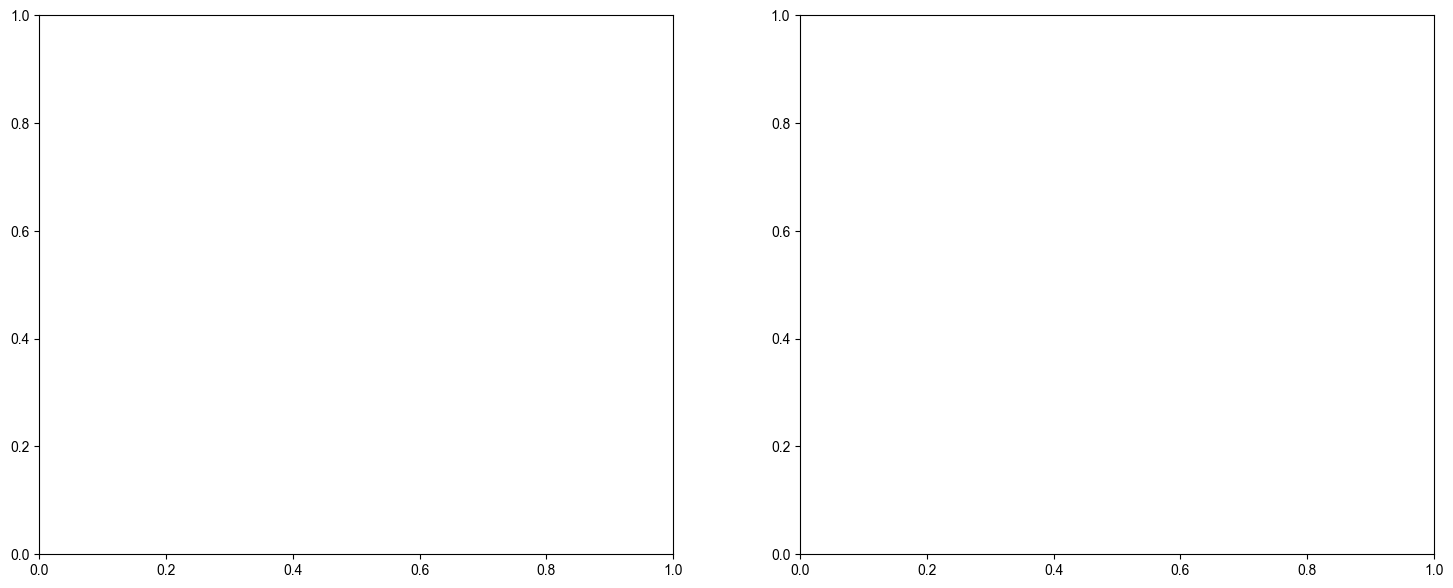

In [31]:

# plot network and stepped scatter plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# network plot
pos = nx.spring_layout(G, seed=42)
node_colors = [modules[n] for n in G.nodes()]
nx.draw(G, pos, node_color=node_colors, cmap=plt.cm.tab10, node_size=400, with_labels=False, ax=ax1)
nx.draw_networkx_labels(G, pos, labels={node_map[name]: name for name in unique_nodes}, font_size=8, ax=ax1)
ax1.set_title("Community Network (Infomap Modules)")

# stepped plot

# Calculate the number of nodes for each (zone, module) pair
size_data = plot_df.groupby(["zone", "module"]).size().reset_index(name='node_count')

# Merge this data back into the plot dataframe
plot_df = plot_df.merge(size_data, on=["zone", "module"])

# make the plot
module_ids = sorted(plot_df["module"].unique())
for module_id in module_ids:
    if module_id % 2 == 0:
        ax2.axhspan(module_id - 0.5, module_id + 0.5, color="lightgrey", alpha=0.3)

scatter = ax2.scatter(
    plot_df["zone"], plot_df["module"],
    s=plot_df["node_count"] * 80,  
    c=plot_df["module"], cmap="tab10", alpha=0.7
)

ax2.set_xlabel("Time (Zone)")
ax2.set_ylabel("Module")
ax2.set_title("Modules Over Time")

# Set x-ticks and labels
ax2.set_xticks(list(zone_map.values()))
ax2.set_xticklabels(list(zone_map.keys()))

# Set y-ticks at integer module IDs
ax2.set_yticks(module_ids)

# remove tick marks keep labels
ax2.tick_params(axis='both', which='both', length=0)

# set ylim
ax2.set_ylim(min(module_ids) - 0.5, max(module_ids) + 0.5)

# Remove gridlines
ax2.grid(False)

# Adjust plot layout
box = ax2.get_position()
ax2.set_position([box.x0, box.y0 + 0.1, box.width * 1.1, box.height * 0.8])

plt.show()
fig.savefig("MHZ_map.png", dpi=600, bbox_inches='tight')


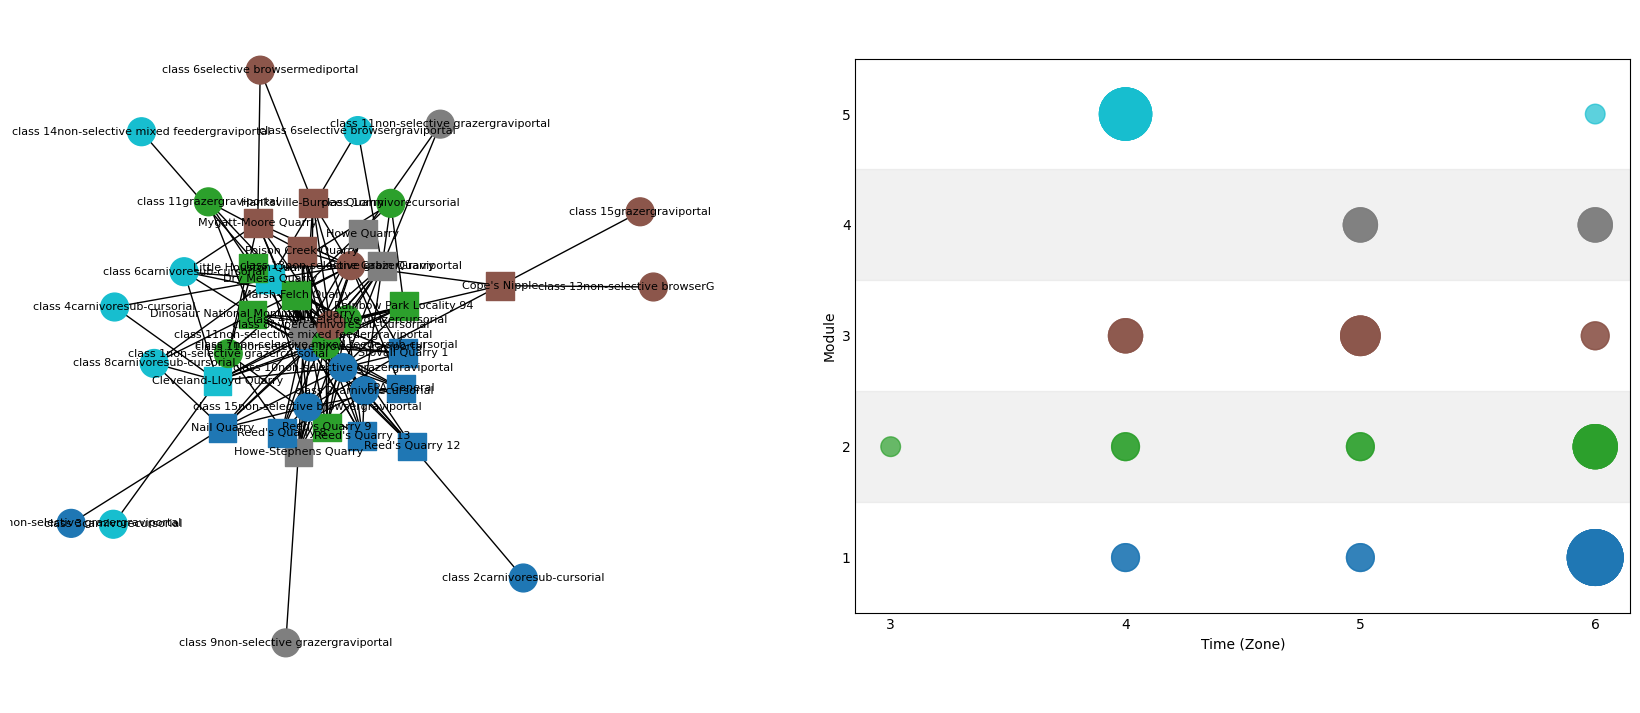

In [11]:
time_col= "time_maidment" # one of: 'foster', 'turner', 'maidment'

# sort data for plotting
zone_order = sorted(df[time_col].unique())
zone_map = {zone: i + 1 for i, zone in enumerate(zone_order)}

node_modules = []
for name in unique_nodes:
    time = df[df['from'] == name][time_col].values
    if len(time) == 0:
        time = df[df['to'] == name][time_col].values
    time = time[0] if len(time) > 0 else "Zone 0"
    module = name_modules[name]
    node_modules.append((name, module, zone_map.get(time, 0)))

plot_df = pd.DataFrame(node_modules, columns=["node", "module", "zone"])

# make networkx graph
G = nx.Graph()
for _, row in df.iterrows():
    u = node_map[row["from"]]
    v = node_map[row["to"]]
    G.add_edge(u, v, weight=row["weight"])

# Assign module as a node attribute
nx.set_node_attributes(G, modules, "module")

# plot network and stepped scatter plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 9))

# Network plot
# Assign shapes 
node_shapes = {}
for _, row in df.iterrows():
    node_shapes[node_map[row["to"]]] = "circle" 
    node_shapes[node_map[row["from"]]] = "square"  

# Group nodes by shape
square_nodes = [n for n, shape in node_shapes.items() if shape == "square"]
circle_nodes = [n for n, shape in node_shapes.items() if shape == "circle"]

# Node positions
pos = nx.spring_layout(G, seed=42)

# Draw edges
nx.draw_networkx_edges(G, pos, ax=ax1)

# Draw square nodes
nx.draw_networkx_nodes(
    G, pos,
    nodelist=square_nodes,
    node_shape='s',
    node_color=[modules[n] for n in square_nodes],
    cmap=plt.cm.tab10,
    node_size=400,
    ax=ax1
)

# Draw circle nodes
nx.draw_networkx_nodes(
    G, pos,
    nodelist=circle_nodes,
    node_shape='o',
    node_color=[modules[n] for n in circle_nodes],
    cmap=plt.cm.tab10,
    node_size=400,
    ax=ax1
)

# Draw labels
nx.draw_networkx_labels(G, pos, labels={node_map[name]: name for name in unique_nodes}, font_size=8, ax=ax1)

# Stepped scatter plot

# Calculate the number of nodes for each (zone, module) pair
size_data = plot_df.groupby(["zone", "module"]).size().reset_index(name='node_count')
plot_df = plot_df.merge(size_data, on=["zone", "module"])

# Background shading for modules
module_ids = sorted(plot_df["module"].unique())
for module_id in module_ids:
    if module_id % 2 == 0:
        ax2.axhspan(module_id - 0.5, module_id + 0.5, color="lightgrey", alpha=0.3)

# Plot scatter with size reflecting node count
scatter = ax2.scatter(
    plot_df["zone"], plot_df["module"],
    s=plot_df["node_count"] * 200,
    c=plot_df["module"], cmap="tab10", alpha=0.7
)

# Axis labels and title
ax2.set_xlabel("Time (Zone)")
ax2.set_ylabel("Module")

# X/Y ticks and labels
ax2.set_xticks(list(zone_map.values()))
ax2.set_xticklabels(list(zone_map.keys()))
ax2.set_yticks(module_ids)

# Clean up axes
ax2.tick_params(axis='both', which='both', length=0)
ax2.set_ylim(min(module_ids) - 0.5, max(module_ids) + 0.5)
ax2.grid(False)

# Remove the black border from the network graph
for spine in ax1.spines.values():
    spine.set_visible(False)

# Layout adjustment
box = ax2.get_position()
ax2.set_position([box.x0, box.y0 + 0.1, box.width * 1.1, box.height * 0.8])
plt.show()


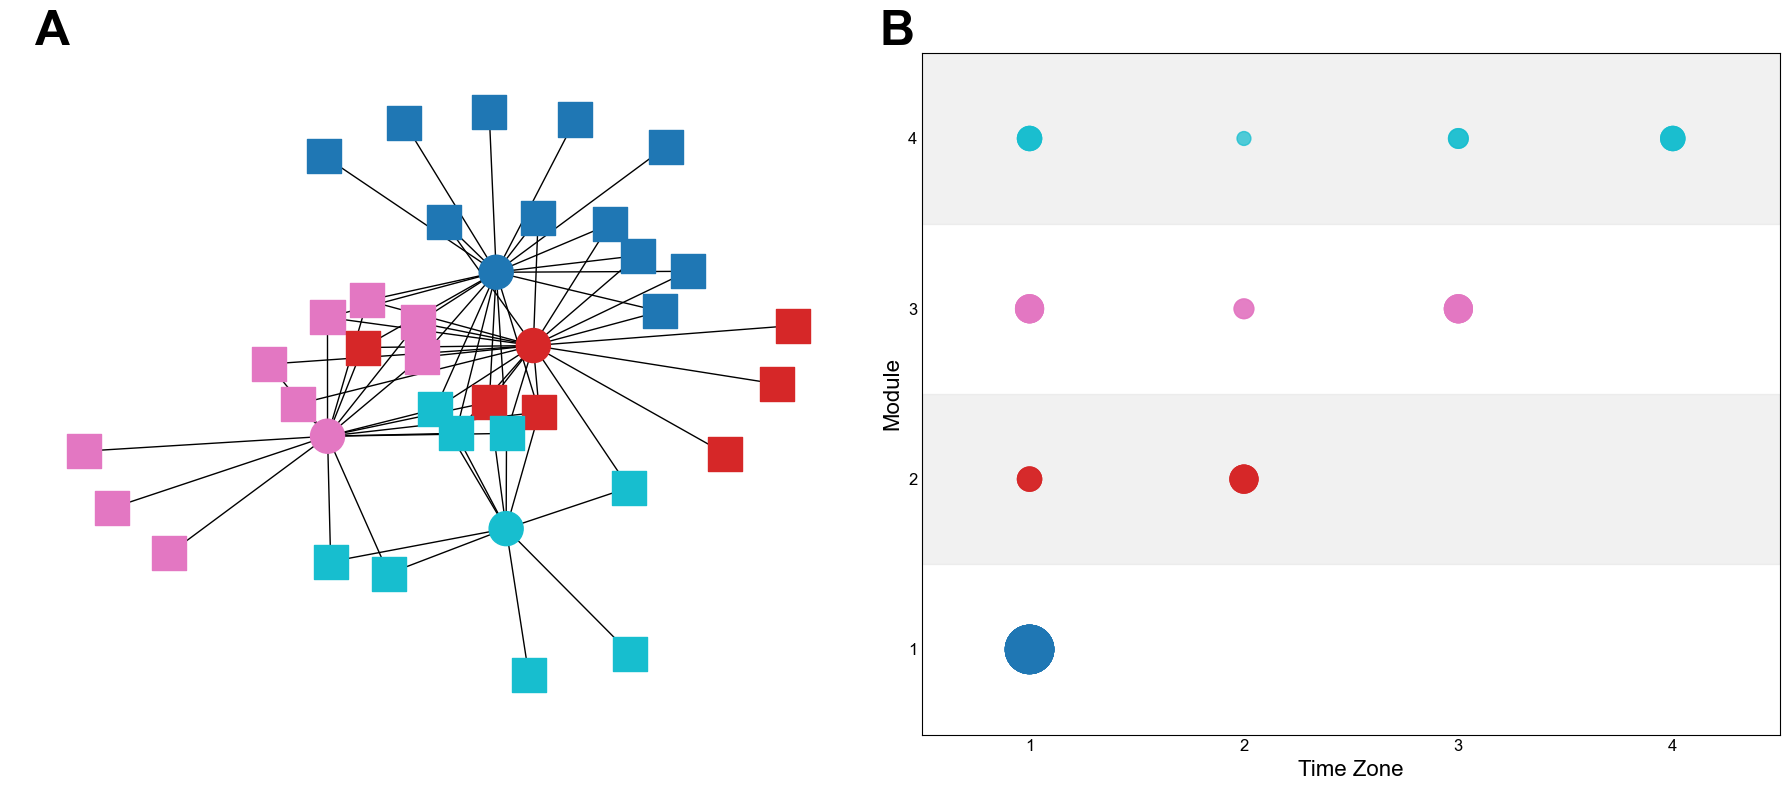

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

plt.rcParams['font.family'] = 'Arial'

# Build zone_map for the 'time' column
zone_map = {zone: i + 1 for i, zone in enumerate(sorted(df["time"].dropna().unique()))}

# Make networkx graph
G = nx.Graph()
for _, row in df.iterrows():
    u = node_map[row["from"]]
    v = node_map[row["to"]]
    G.add_edge(u, v, weight=row["weight"])

nx.set_node_attributes(G, modules, "module")

# Prepare figure: 1 network plot (left), 1 time scatter plot (right)
fig = plt.figure(figsize=(18, 8))
gs = fig.add_gridspec(1, 2, width_ratios=[2, 2])
ax_net = fig.add_subplot(gs[0])  # Network plot
ax_time = fig.add_subplot(gs[1])  # Time scatter plot

# ======= Network Plot =======
# Assign shapes
node_shapes = {}
for _, row in df.iterrows():
    node_shapes[node_map[row["to"]]] = "circle"
    node_shapes[node_map[row["from"]]] = "square"

square_nodes = [n for n, shape in node_shapes.items() if shape == "square"]
circle_nodes = [n for n, shape in node_shapes.items() if shape == "circle"]

pos = nx.spring_layout(G, seed=42)

nx.draw_networkx_edges(G, pos, ax=ax_net)

nx.draw_networkx_nodes(
    G, pos,
    nodelist=square_nodes, node_shape='s',
    node_color=[modules.get(n, -1) for n in square_nodes],  # Fallback to -1
    cmap=plt.cm.tab10, node_size=600, ax=ax_net
)

nx.draw_networkx_nodes(
    G, pos,
    nodelist=circle_nodes, node_shape='o',
    node_color=[modules.get(n, -1) for n in circle_nodes],  # Fallback to -1
    cmap=plt.cm.tab10, node_size=600, ax=ax_net
)
for spine in ax_net.spines.values():
    spine.set_visible(False)
ax_net.set_title("A", y=1, x=0.05, fontsize=35, fontweight='bold')

# ======= Time Scatter Plot =======
node_modules = []
for name in unique_nodes:
    time_val = df[df['from'] == name]['time'].values
    if len(time_val) == 0:
        time_val = df[df['to'] == name]['time'].values
    time_val = time_val[0] if len(time_val) > 0 else "Zone 0"
    module = name_modules.get(name, -1)
    node_modules.append((name, module, zone_map.get(time_val, 0)))

plot_df = pd.DataFrame(node_modules, columns=["node", "module", "zone"])

# Get node count per (zone, module)
size_data = plot_df.groupby(["zone", "module"]).size().reset_index(name='node_count')
plot_df = plot_df.merge(size_data, on=["zone", "module"])

module_ids = sorted(plot_df["module"].unique())
for module_id in module_ids:
    if module_id % 2 == 0:
        ax_time.axhspan(module_id - 0.5, module_id + 0.5, color="lightgrey", alpha=0.3)

# Plot scatter
ax_time.scatter(
    plot_df["zone"], plot_df["module"],
    s=plot_df["node_count"] * 100,
    c=plot_df["module"], cmap="tab10", alpha=0.75
)

ax_time.set_ylabel("Module", fontsize=16)
ax_time.set_title("B", y=1, x=-0.03, fontsize=35, fontweight='bold')
ax_time.set_xticks(list(zone_map.values()))
ax_time.set_xticklabels(list(zone_map.keys()), fontsize=12)
ax_time.set_yticks(module_ids)
ax_time.set_yticklabels(module_ids, fontsize=12)
ax_time.tick_params(axis='both', which='both', length=0)
ax_time.set_ylim(min(module_ids) - 0.5, max(module_ids) + 0.5)
ax_time.set_xlabel("Time Zone", fontsize=16)
ax_time.grid(False)

zones = list(zone_map.values())
buffer = 0.5
ax_time.set_xlim(min(zones) - buffer, max(zones) + buffer)

plt.tight_layout()
plt.show()
fig.savefig("DPF_taxa_plot.png", dpi=1000, bbox_inches='tight')


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

plt.rcParams['font.family'] = 'Arial'

# === Define custom hex colours ===
custom_colors = ['#648FFF', '#FE6100', '#785EF0', '#FFB000', '#DC267F', '#009E73', '#F0E442', '#0072B2']

# Build zone_maps for all time schemes
time_cols = ["time_foster", "time_turner", "time_maidment"]
zone_maps = {
    time_col: {zone: i + 1 for i, zone in enumerate(sorted(df[time_col].dropna().unique()))}
    for time_col in time_cols
}

# Make networkx graph
G = nx.Graph()
for _, row in df.iterrows():
    u = node_map[row["from"]]
    v = node_map[row["to"]]
    G.add_edge(u, v, weight=row["weight"])

nx.set_node_attributes(G, modules, "module")

# Map module IDs to custom colours
unique_modules = sorted(set(modules.values()))
module_color_map = {mod: custom_colors[i % len(custom_colors)] for i, mod in enumerate(unique_modules)}

# Prepare for plotting: 1 network plot + 3 stepped plots
fig = plt.figure(figsize=(22, 14))
gs = fig.add_gridspec(3, 2, width_ratios=[2, 2])
ax_net = fig.add_subplot(gs[:, 0])  # Network plot on the left
axes = [fig.add_subplot(gs[i, 1]) for i in range(3)]  # 3 vertical plots on the right

# ======= Network Plot =======
# Assign shapes 
node_shapes = {}
for _, row in df.iterrows():
    node_shapes[node_map[row["to"]]] = "circle"
    node_shapes[node_map[row["from"]]] = "square"

# Group nodes by shape
square_nodes = [n for n, shape in node_shapes.items() if shape == "square"]
circle_nodes = [n for n, shape in node_shapes.items() if shape == "circle"]

# Node positions
pos = nx.spring_layout(G, seed=42)

# Draw edges and nodes
nx.draw_networkx_edges(G, pos, ax=ax_net)
nx.draw_networkx_nodes(G, pos, nodelist=square_nodes, node_shape='s', edgecolors='black',
                       node_color=[module_color_map.get(modules[n], "#cccccc") for n in square_nodes],
                       linewidths=1.5, node_size=600, ax=ax_net)
nx.draw_networkx_nodes(G, pos, nodelist=circle_nodes, node_shape='o', edgecolors='black',
                       node_color=[module_color_map.get(modules[n], "#cccccc") for n in circle_nodes],
                       linewidths=1.5, node_size=600, ax=ax_net)

# nx.draw_networkx_labels(G, pos, labels={node_map[name]: name for name in unique_nodes},
#                         font_size=8, ax=ax_net)

for spine in ax_net.spines.values():
    spine.set_visible(False)
ax_net.set_title("A", y=1, x=0.05, fontsize=35, fontweight='bold')

letter_dict = {1: "B", 2: "C", 3: "D"}

# stepped scatter plots
for i, time_col in enumerate(time_cols):
    ax = axes[i]
    zone_map = zone_maps[time_col]

    node_modules = []
    for name in unique_nodes:
        time = df[df['from'] == name][time_col].values
        if len(time) == 0:
            time = df[df['to'] == name][time_col].values
        time = time[0] if len(time) > 0 else "Zone 0"
        module = name_modules.get(name, -1)
        node_modules.append((name, module, zone_map.get(time, 0)))

    plot_df = pd.DataFrame(node_modules, columns=["node", "module", "zone"])

    # Calculate node count per (zone, module)
    size_data = plot_df.groupby(["zone", "module"]).size().reset_index(name='node_count')
    plot_df = plot_df.merge(size_data, on=["zone", "module"])

    module_ids = sorted(plot_df["module"].unique())
    for module_id in module_ids:
        if module_id % 2 == 0:
            ax.axhspan(module_id - 0.5, module_id + 0.5, color="lightgrey", alpha=0.3)

    # Plot scatter with size reflecting node count
    ax.scatter(
        plot_df["zone"], plot_df["module"],
        s=plot_df["node_count"] * 100,
        c=[module_color_map.get(m, "#cccccc") for m in plot_df["module"]],
        alpha=0.75
    )

    # Draw vertical line before 'na' for turner
    if time_col == "time_turner":
        for key, val in zone_map.items():
            if str(key).lower() == "na":
                ax.axvline(x=val - 0.5, color="black", linestyle="--", linewidth=1.3)
                break

    ax.set_ylabel("Module", fontsize=16)
    ax.set_title(letter_dict[i + 1], y=1, x=-0.03, fontsize=35, fontweight='bold')
    ax.set_xticks(list(zone_map.values()))
    ax.set_xticklabels(
        [str(int(x)) if isinstance(x, (int, float)) and x == int(x) else str(x) for x in zone_map.keys()],
        fontsize=15
    )
    ax.set_yticks(module_ids)
    ax.set_yticklabels([f"M{m}" for m in module_ids], fontsize=15)

    # === Add external module numbers to the right of the plot ===
    xmax = max(zone_map.values()) + 0.5
    for i in range(len(module_ids)):
        ax.text(xmax+0.05, module_ids[i], round(average_similarities[i+1],2), va='center', fontsize=15)

    ax.tick_params(axis='both', which='both', length=0)
    ax.set_ylim(min(module_ids) - 0.5, max(module_ids) + 0.5)
    ax.grid(False)
    ax.set_xlabel("Time Zone", fontsize=16)

    zones = list(zone_map.values())
    buffer = 0.5  # Adjust as needed (e.g. 1 for bigger gaps)
    ax.set_xlim(min(zones) - buffer, max(zones) + buffer)

plt.tight_layout()
plt.show()

# Save the final plot
fig.savefig("morrison_final_taxonomic_names.png", dpi=600, bbox_inches='tight')

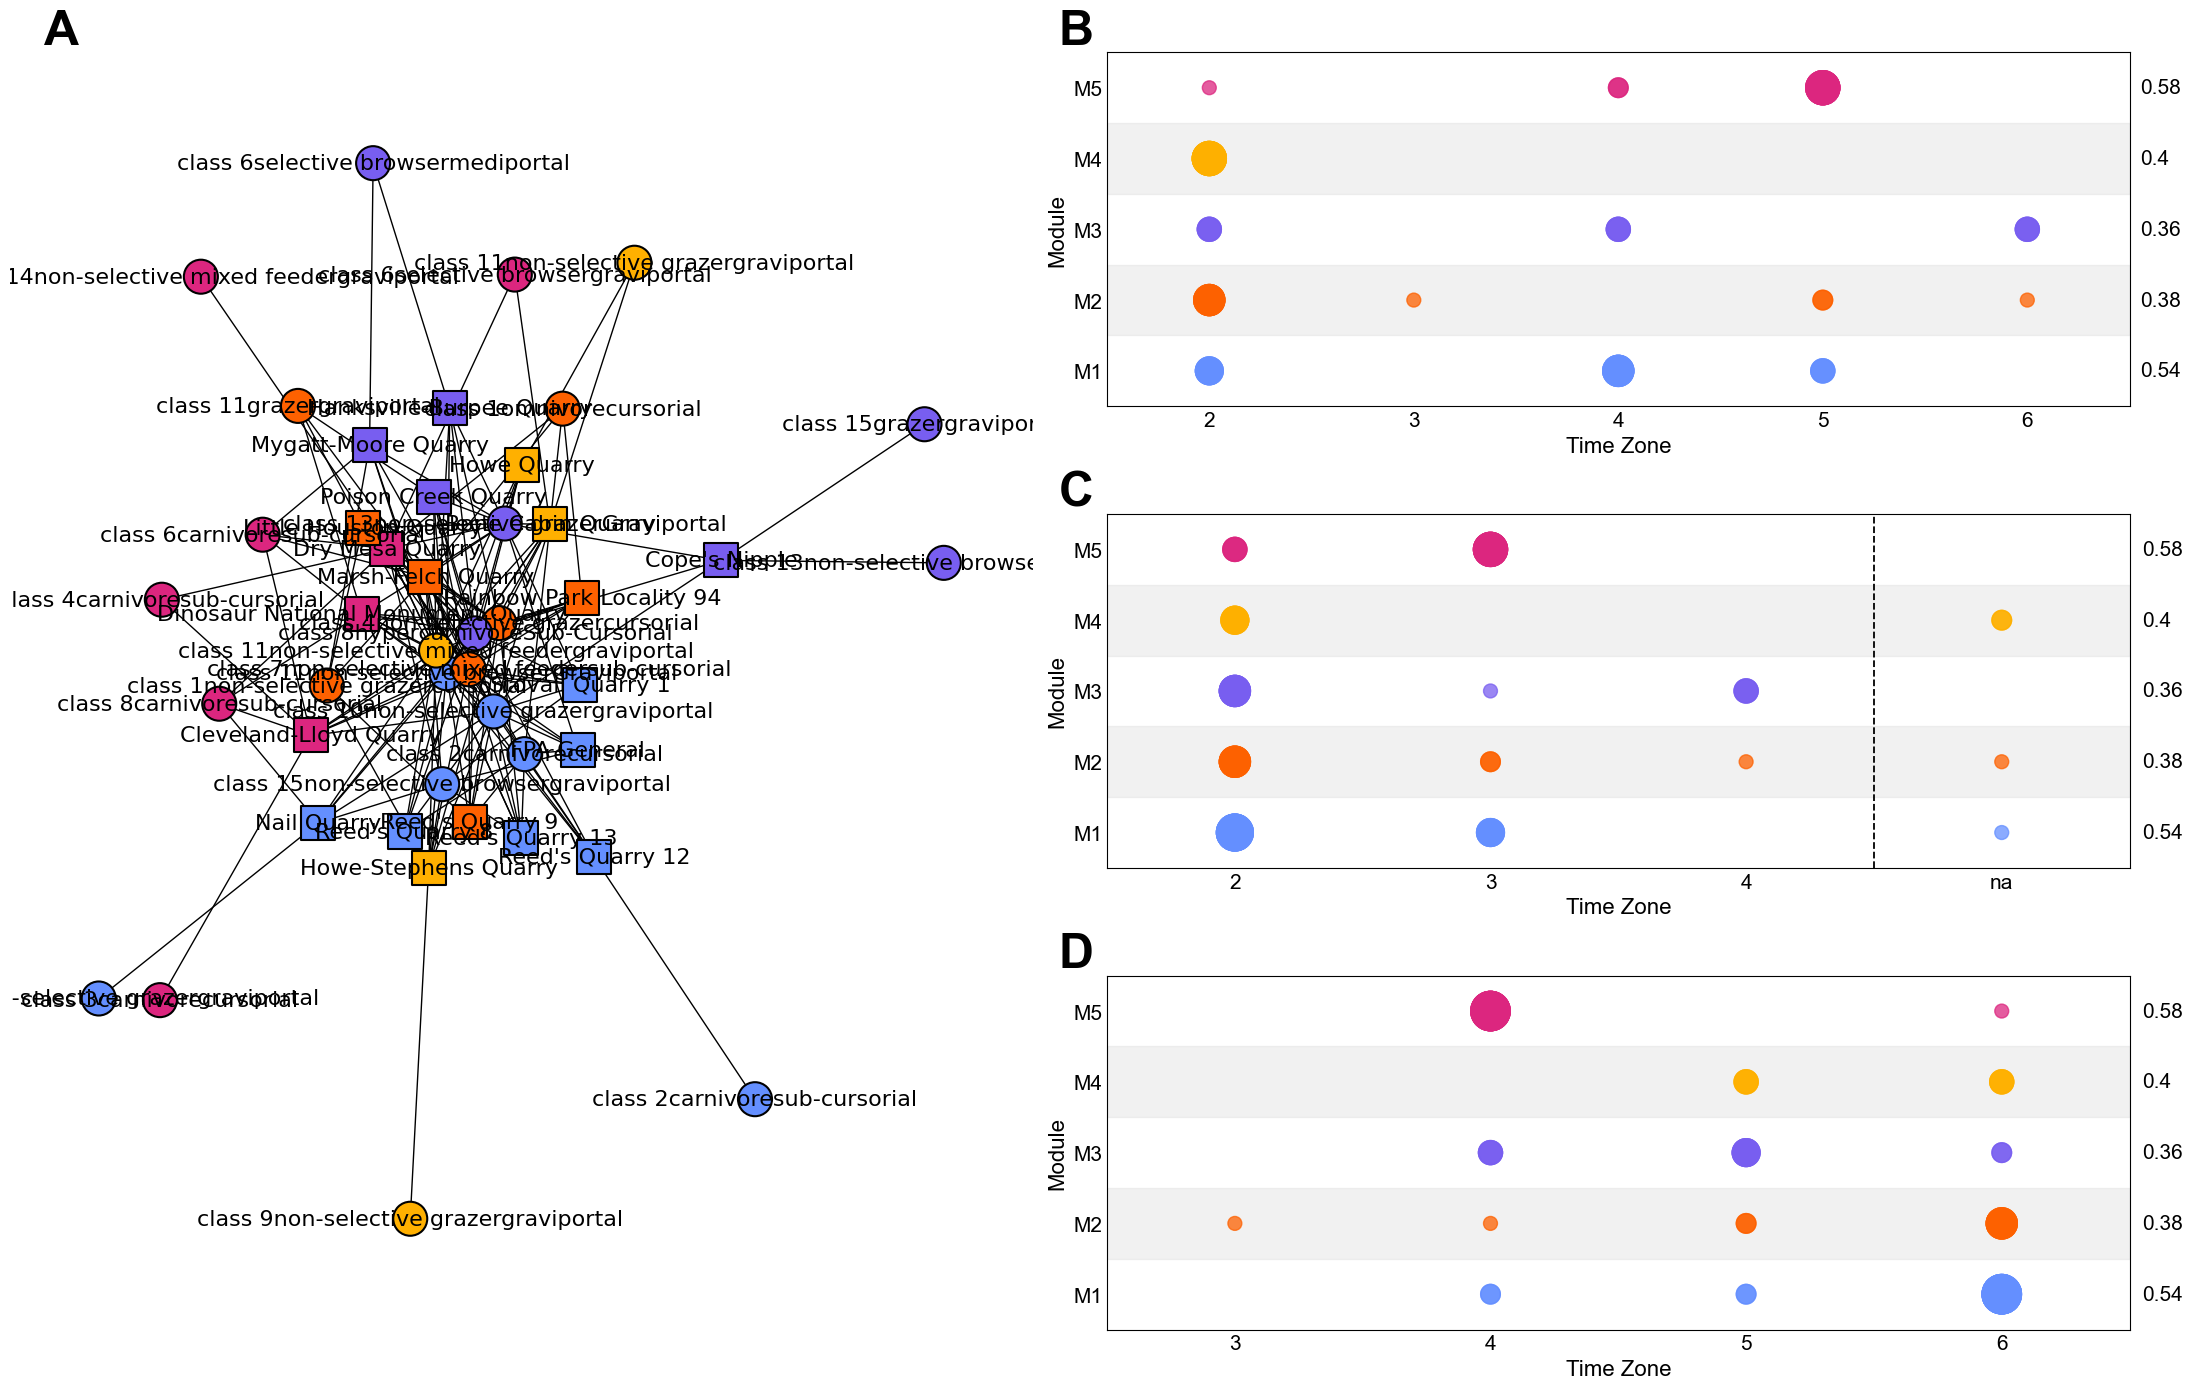

In [10]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

plt.rcParams['font.family'] = 'Arial'

# === Define custom hex colours ===
custom_colors = ['#648FFF', '#FE6100', '#785EF0', '#FFB000', '#DC267F', '#009E73', '#F0E442', '#0072B2']

# Build zone_maps for all time schemes
time_cols = ["time_foster", "time_turner", "time_maidment"]
zone_maps = {
    time_col: {zone: i + 1 for i, zone in enumerate(sorted(df[time_col].dropna().unique()))}
    for time_col in time_cols
}

# Make networkx graph
G = nx.Graph()
for _, row in df.iterrows():
    u = node_map[row["from"]]
    v = node_map[row["to"]]
    G.add_edge(u, v, weight=row["weight"])

nx.set_node_attributes(G, modules, "module")

# Map module IDs to custom colours
unique_modules = sorted(set(modules.values()))
module_color_map = {mod: custom_colors[i % len(custom_colors)] for i, mod in enumerate(unique_modules)}

# Prepare for plotting: 1 network plot + 3 stepped plots
fig = plt.figure(figsize=(22, 14))
gs = fig.add_gridspec(3, 2, width_ratios=[2, 2])
ax_net = fig.add_subplot(gs[:, 0])  # Network plot on the left
axes = [fig.add_subplot(gs[i, 1]) for i in range(3)]  # 3 vertical plots on the right

# ======= Network Plot =======
# Assign shapes 
node_shapes = {}
for _, row in df.iterrows():
    node_shapes[node_map[row["to"]]] = "circle"
    node_shapes[node_map[row["from"]]] = "square"

# Group nodes by shape
square_nodes = [n for n, shape in node_shapes.items() if shape == "square"]
circle_nodes = [n for n, shape in node_shapes.items() if shape == "circle"]

# Node positions
pos = nx.spring_layout(G, seed=42)

# Draw edges and nodes
nx.draw_networkx_edges(G, pos, ax=ax_net)
nx.draw_networkx_nodes(G, pos, nodelist=square_nodes, node_shape='s', edgecolors='black',
                       node_color=[module_color_map.get(modules[n], "#cccccc") for n in square_nodes],
                       linewidths=1.5, node_size=600, ax=ax_net)
nx.draw_networkx_nodes(G, pos, nodelist=circle_nodes, node_shape='o', edgecolors='black',
                       node_color=[module_color_map.get(modules[n], "#cccccc") for n in circle_nodes],
                       linewidths=1.5, node_size=600, ax=ax_net)

# === Add node labels ===
reverse_node_map = {v: k for k, v in node_map.items()}
labels = {node: reverse_node_map[node] for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=16, ax=ax_net)

for spine in ax_net.spines.values():
    spine.set_visible(False)
ax_net.set_title("A", y=1, x=0.05, fontsize=35, fontweight='bold')

letter_dict = {1: "B", 2: "C", 3: "D"}

# stepped scatter plots
for i, time_col in enumerate(time_cols):
    ax = axes[i]
    zone_map = zone_maps[time_col]

    node_modules = []
    for name in unique_nodes:
        time = df[df['from'] == name][time_col].values
        if len(time) == 0:
            time = df[df['to'] == name][time_col].values
        time = time[0] if len(time) > 0 else "Zone 0"
        module = name_modules.get(name, -1)
        node_modules.append((name, module, zone_map.get(time, 0)))

    plot_df = pd.DataFrame(node_modules, columns=["node", "module", "zone"])

    # Calculate node count per (zone, module)
    size_data = plot_df.groupby(["zone", "module"]).size().reset_index(name='node_count')
    plot_df = plot_df.merge(size_data, on=["zone", "module"])

    module_ids = sorted(plot_df["module"].unique())
    for module_id in module_ids:
        if module_id % 2 == 0:
            ax.axhspan(module_id - 0.5, module_id + 0.5, color="lightgrey", alpha=0.3)

    # Plot scatter with size reflecting node count
    ax.scatter(
        plot_df["zone"], plot_df["module"],
        s=plot_df["node_count"] * 100,
        c=[module_color_map.get(m, "#cccccc") for m in plot_df["module"]],
        alpha=0.75
    )

    # Draw vertical line before 'na' for turner
    if time_col == "time_turner":
        for key, val in zone_map.items():
            if str(key).lower() == "na":
                ax.axvline(x=val - 0.5, color="black", linestyle="--", linewidth=1.3)
                break

    ax.set_ylabel("Module", fontsize=16)
    ax.set_title(letter_dict[i + 1], y=1, x=-0.03, fontsize=35, fontweight='bold')
    ax.set_xticks(list(zone_map.values()))
    ax.set_xticklabels(
        [str(int(x)) if isinstance(x, (int, float)) and x == int(x) else str(x) for x in zone_map.keys()],
        fontsize=15
    )
    ax.set_yticks(module_ids)
    ax.set_yticklabels([f"M{m}" for m in module_ids], fontsize=15)

    # === Add external module numbers to the right of the plot ===
    xmax = max(zone_map.values()) + 0.5
    for j in range(len(module_ids)):
        ax.text(xmax+0.05, module_ids[j], round(average_similarities[module_ids[j]], 2), va='center', fontsize=15)

    ax.tick_params(axis='both', which='both', length=0)
    ax.set_ylim(min(module_ids) - 0.5, max(module_ids) + 0.5)
    ax.grid(False)
    ax.set_xlabel("Time Zone", fontsize=16)

    zones = list(zone_map.values())
    buffer = 0.5
    ax.set_xlim(min(zones) - buffer, max(zones) + buffer)

plt.tight_layout()
plt.show()

# Save the final plot
fig.savefig("morrison_final_classifications_names.png", dpi=600, bbox_inches='tight')


In [3]:
time_col= "time" # one of: 'foster', 'turner', 'maidment'

# sort data for plotting
zone_order = sorted(df[time_col].unique())
zone_map = {zone: i + 1 for i, zone in enumerate(zone_order)}

node_modules = []
for name in unique_nodes:
    time = df[df['from'] == name][time_col].values
    if len(time) == 0:
        time = df[df['to'] == name][time_col].values
    time = time[0] if len(time) > 0 else "Zone 0"
    module = name_modules[name]
    node_modules.append((name, module, zone_map.get(time, 0)))

plot_df = pd.DataFrame(node_modules, columns=["node", "module", "zone"])
plot_df = plot_df.drop(columns=["zone"]).sort_values(by="module").reset_index(drop=True)
plot_df.to_csv("DPF_taxa_module.csv", index=False)

#### Alternative size calssification test

In [ ]:
df2 = df

# load csv
csv_path = "drymesahighsize.csv" 
df = pd.read_csv(csv_path)

zone_dict = dict(zip(df2['from'], df2['time']))
# add column to df called time which uses the zone_dict to map the from column to the time column
df['time'] = df['from'].map(zone_dict)
# make unmapped values Zone 0
df['time'] = df['time'].fillna('Zone 0')
df.to_csv("drymesahighsize.csv", index=False)

KeyError: 'time'

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from infomap import Infomap
import networkx as nx
import numpy as np

# load csv
csv_path = "drymesahighsize.csv" 
df = pd.read_csv(csv_path)

# map node names to int
unique_nodes = pd.unique(df[['from', 'to']].values.ravel())
node_map = {name: i for i, name in enumerate(unique_nodes)}
reverse_node_map = {i: name for name, i in node_map.items()}

# build network with infomap
im = Infomap("--two-level --markov-time 0.3 --preferred-number-of-modules 5")

for _, row in df.iterrows():
    u = node_map[row["from"]]
    v = node_map[row["to"]]
    weight = float(row["weight"])
    im.add_link(u, v, weight)

im.run()

# id modules
modules = {node.node_id: node.module_id for node in im.nodes}
name_modules = {reverse_node_map[node_id]: mod for node_id, mod in modules.items()}

# sort data for plotting
zone_order = sorted(df['time'].unique())
zone_map = {zone: i + 1 for i, zone in enumerate(zone_order)}

node_modules = []
for name in unique_nodes:
    time = df[df['from'] == name]['time'].values
    if len(time) == 0:
        time = df[df['to'] == name]['time'].values
    time = time[0] if len(time) > 0 else "Zone 0"
    module = name_modules[name]
    node_modules.append((name, module, zone_map.get(time, 0)))

plot_df = pd.DataFrame(node_modules, columns=["node", "module", "zone"])

# make networkx graph
G = nx.Graph()
for _, row in df.iterrows():
    u = node_map[row["from"]]
    v = node_map[row["to"]]
    G.add_edge(u, v, weight=row["weight"])

# Assign module as a node attribute
nx.set_node_attributes(G, modules, "module")

  Infomap v2.8.0 starts at 2025-04-28 10:52:58
  -> Input network: 
  -> No file output!
  -> Configuration: two-level
                    markov-time = 0.3
                    preferred-number-of-modules = 5
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'undirected'... 
  -> Using undirected links.
  => Sum node flow: 1, sum link flow: 1
Build internal network with 51 nodes and 151 links...
  -> Rescale link flow with global Markov time 0.3
  -> One-level codelength: 5.1655356

Trial 1/1 starting at 2025-04-28 10:52:58
Two-level compression: -1.8% 24% 
Partitioned to codelength 0.404374636 + 3.56544151 + 0 = 3.969816142 in 5 modules.

=> Trial 1/1 finished in 0.000305708s with codelength 3.96981614


Summary after 1 trial
Best end modular solution in 2 levels:
Per level number of modules:         [          5,           0] (sum: 5)
Per level number of leaf nodes:      [          0,          51] (sum: 

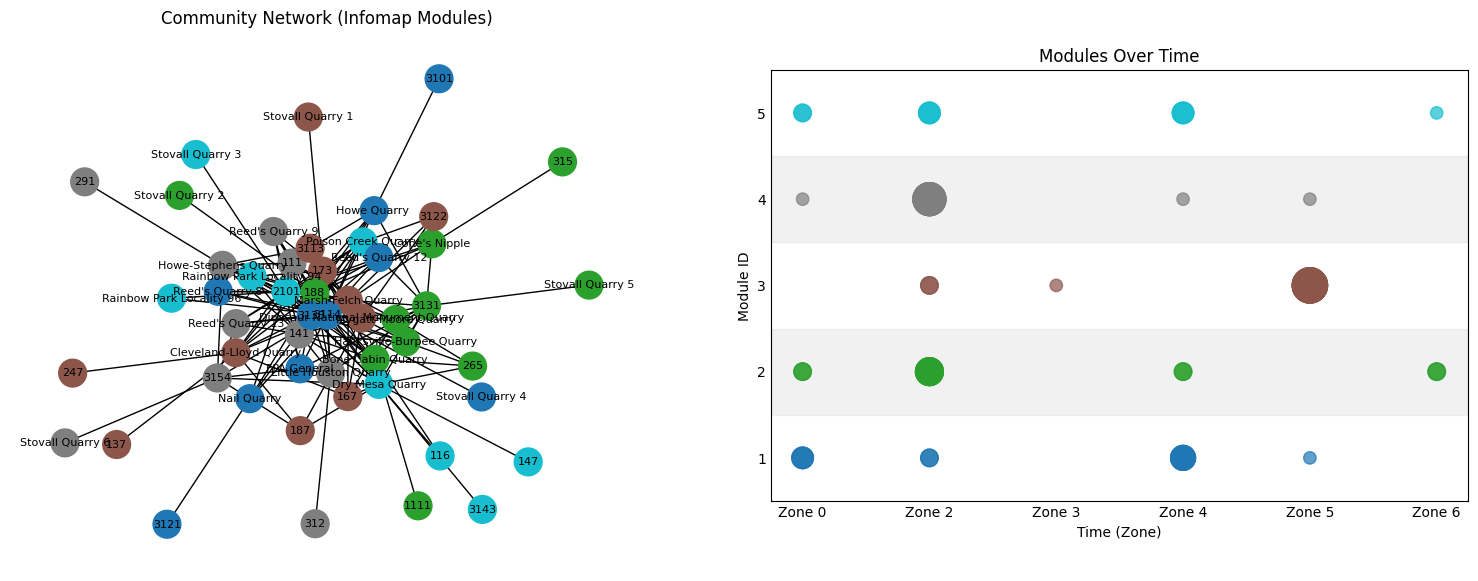

In [ ]:

# plot network and stepped scatter plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# network plot
pos = nx.spring_layout(G, seed=42)
node_colors = [modules[n] for n in G.nodes()]
nx.draw(G, pos, node_color=node_colors, cmap=plt.cm.tab10, node_size=400, with_labels=False, ax=ax1)
nx.draw_networkx_labels(G, pos, labels={node_map[name]: name for name in unique_nodes}, font_size=8, ax=ax1)
ax1.set_title("Community Network (Infomap Modules)")

# stepped plot

# Calculate the number of nodes for each (zone, module) pair
size_data = plot_df.groupby(["zone", "module"]).size().reset_index(name='node_count')

# Merge this data back into the plot dataframe
plot_df = plot_df.merge(size_data, on=["zone", "module"])

# make the plot
mmodule_ids = sorted(plot_df["module"].unique())
for module_id in module_ids:
    if module_id % 2 == 0:
        ax2.axhspan(module_id - 0.5, module_id + 0.5, color="lightgrey", alpha=0.3)

scatter = ax2.scatter(
    plot_df["zone"], plot_df["module"],
    s=plot_df["node_count"] * 80,  
    c=plot_df["module"], cmap="tab10", alpha=0.7
)

ax2.set_xlabel("Time (Zone)")
ax2.set_ylabel("Module")
ax2.set_title("Modules Over Time")

# Set x-ticks and labels
ax2.set_xticks(list(zone_map.values()))
ax2.set_xticklabels(list(zone_map.keys()))

# Set y-ticks at integer module IDs
ax2.set_yticks(mmodule_ids)

# remove tick marks keep labels
ax2.tick_params(axis='both', which='both', length=0)

# set ylim
ax2.set_ylim(min(mmodule_ids) - 0.5, max(mmodule_ids) + 0.5)

# Remove gridlines
ax2.grid(False)

# Adjust plot layout
box = ax2.get_position()
ax2.set_position([box.x0, box.y0 + 0.1, box.width * 1.1, box.height * 0.8])

plt.show()